In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [4]:
# Load the dataset
df = pd.read_csv('/content/demonetization-tweets.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(df.head())


   Unnamed: 0  X                                               text  \
0           1  1  RT @rssurjewala: Critical question: Was PayTM ...   
1           2  2  RT @Hemant_80: Did you vote on #Demonetization...   
2           3  3  RT @roshankar: Former FinSec, RBI Dy Governor,...   
3           4  4  RT @ANI_news: Gurugram (Haryana): Post office ...   
4           5  5  RT @satishacharya: Reddy Wedding! @mail_today ...   

   favorited  favoriteCount replyToSN              created  truncated  \
0      False              0       NaN  2016-11-23 18:40:30      False   
1      False              0       NaN  2016-11-23 18:40:29      False   
2      False              0       NaN  2016-11-23 18:40:03      False   
3      False              0       NaN  2016-11-23 18:39:59      False   
4      False              0       NaN  2016-11-23 18:39:39      False   

   replyToSID            id  replyToUID  \
0         NaN  8.014957e+17         NaN   
1         NaN  8.014957e+17         NaN   
2    

In [5]:
# Check the column names
print(df.columns)


Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')


In [11]:
print(df.isnull().sum())


Unnamed: 0           0
X                    0
text                 0
favorited            0
favoriteCount        0
replyToSN        13838
created              0
truncated            0
replyToSID       14054
id                   0
replyToUID       13838
statusSource         0
screenName           0
retweetCount         0
isRetweet            0
retweeted            0
dtype: int64


In [12]:
# Load the dataset
df = pd.read_csv('/content/demonetization-tweets.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(df.head())

# Check column names
print(df.columns)


   Unnamed: 0  X                                               text  \
0           1  1  RT @rssurjewala: Critical question: Was PayTM ...   
1           2  2  RT @Hemant_80: Did you vote on #Demonetization...   
2           3  3  RT @roshankar: Former FinSec, RBI Dy Governor,...   
3           4  4  RT @ANI_news: Gurugram (Haryana): Post office ...   
4           5  5  RT @satishacharya: Reddy Wedding! @mail_today ...   

   favorited  favoriteCount replyToSN              created  truncated  \
0      False              0       NaN  2016-11-23 18:40:30      False   
1      False              0       NaN  2016-11-23 18:40:29      False   
2      False              0       NaN  2016-11-23 18:40:03      False   
3      False              0       NaN  2016-11-23 18:39:59      False   
4      False              0       NaN  2016-11-23 18:39:39      False   

   replyToSID            id  replyToUID  \
0         NaN  8.014957e+17         NaN   
1         NaN  8.014957e+17         NaN   
2    

In [22]:
import re
import nltk # Import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Import SentimentIntensityAnalyzer

# Download the stopwords and vader lexicon resource
nltk.download('stopwords')
nltk.download('vader_lexicon')

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'@\w+|#\w+', '', tweet)
    # Remove special characters and numbers
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = tweet.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing to the tweet text
if 'text' in df.columns:
    df['cleaned_text'] = df['text'].apply(preprocess_tweet)
else:
    print("'text' column is missing from the dataset.")

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<ipython-input-23-f31c3e344a5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


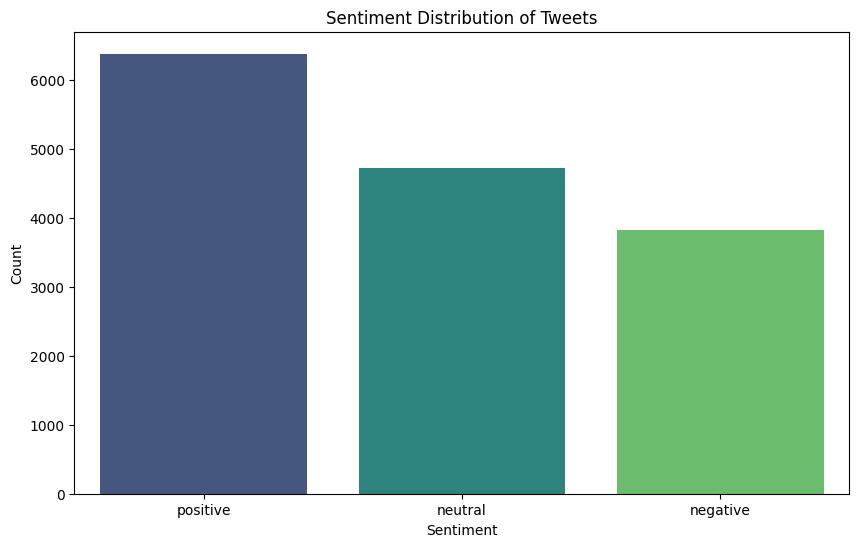

In [23]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


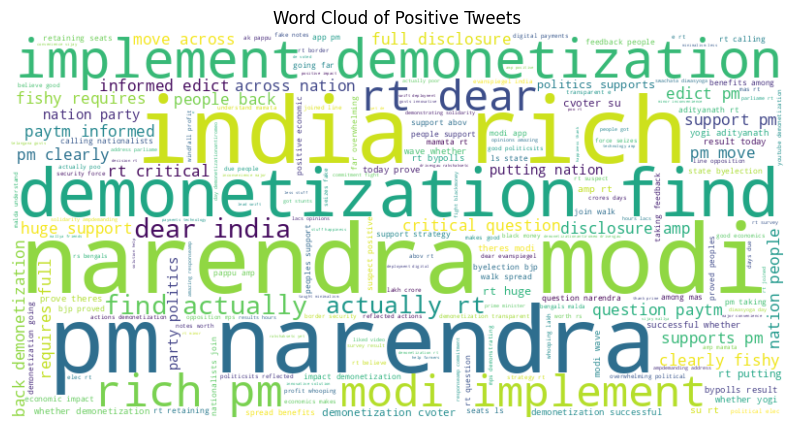

In [24]:
from wordcloud import WordCloud

# Generate word cloud for positive tweets
positive_tweets = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.show()
